In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
nose_cascade=cv2.CascadeClassifier("Nose18x15.xml")
eye_cascade=cv2.CascadeClassifier("frontalEyes35x16.xml")

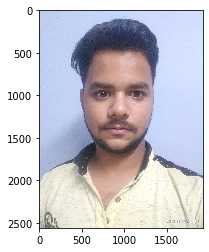

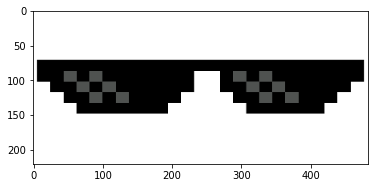

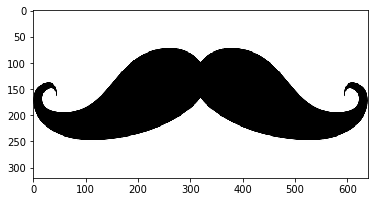

In [3]:
img=cv2.imread('pulkit.jpg',-1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

glasses=cv2.imread('glasses.png',-1)
#glasses=cv2.cvtColor(glasses,cv2.COLOR_BGR2RGBA)
plt.imshow(glasses)
plt.show()

mustache=cv2.imread('mustache.png',cv2.IMREAD_UNCHANGED)
#mustache=cv2.cvtColor(mustache,cv2.COLOR_BGR2RGB)
plt.imshow(mustache)
plt.show()


In [4]:
def overlay_image_alpha(img, img_overlay, pos, alpha_mask):
    """Overlay img_overlay on top of img at the position specified by
    pos and blend using alpha_mask.

    Alpha mask must contain values within the range [0, 1] and be the
    same size as img_overlay.
    """

    x, y = pos

    # Image ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    # Overlay ranges
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    channels = img.shape[2]

    alpha = alpha_mask[y1o:y2o, x1o:x2o]
    alpha_inv = 1.0 - alpha

    for c in range(channels):
        img[y1:y2, x1:x2, c] = (alpha * img_overlay[y1o:y2o, x1o:x2o, c] +
                                alpha_inv * img[y1:y2, x1:x2, c])

In [5]:
eyes=eye_cascade.detectMultiScale(img,1.3,2)
nose=nose_cascade.detectMultiScale(img,1.3,5)
print(eyes)
print(nose)

[[533 779 815 373]]
[[1348 2017   40   34]
 [1694 2241   44   36]
 [1112 2199   98   81]
 [1326 2384  111   92]
 [ 789 1062  283  236]]


In [6]:
x,y,w,h=eyes[0]
glasses=cv2.resize(glasses,(w,h))
overlay_image_alpha(img,glasses[:, :, 0:3],(x, y),glasses[:, :, 3] / 255.0)

In [7]:
print(eyes)
print(nose)

[[533 779 815 373]]
[[1348 2017   40   34]
 [1694 2241   44   36]
 [1112 2199   98   81]
 [1326 2384  111   92]
 [ 789 1062  283  236]]


141
(152, 303, 4)


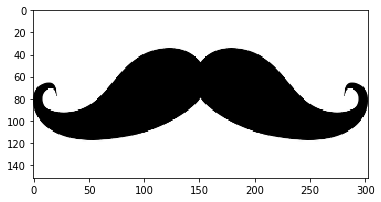

In [8]:
(x,y,w,h)=nose[4]
xs=mustache.shape[1]
ys=mustache.shape[0]
per=w/xs
xh=int(ys*per)
print(xh)

mustache=cv2.resize(mustache,(w+20,xh+11))
print(mustache.shape)
plt.imshow(mustache)

In [9]:
ypos=int(y+0.56*h)

overlay_image_alpha(img,mustache[:, :, 0:3],(x, ypos),mustache[:, :, 3] / 255.0)

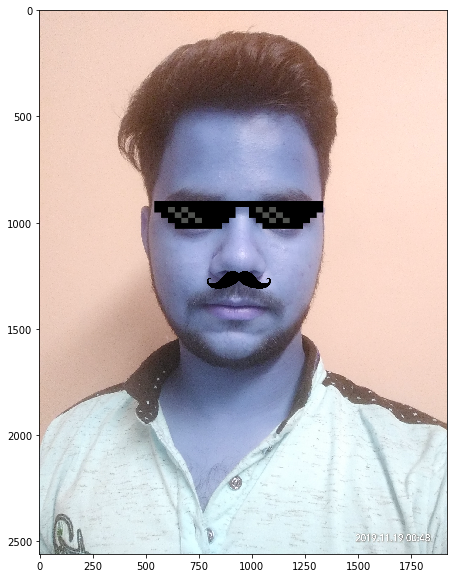

In [10]:
plt.figure(figsize=(10,10))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

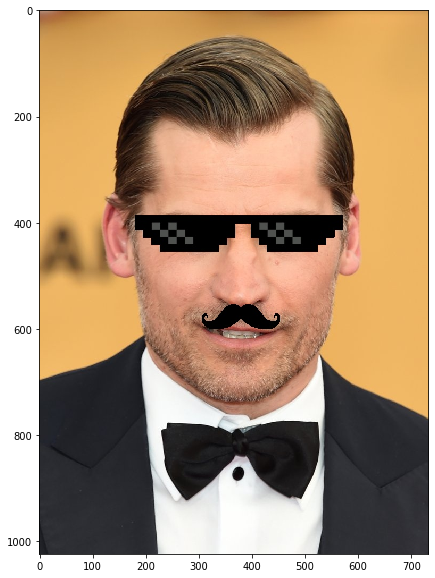

In [11]:
imgg=cv2.imread('Jamie_After.jpg',-1)

imgg=cv2.cvtColor(imgg,cv2.COLOR_BGR2RGBA)
plt.figure(figsize=(10,10))
plt.imshow(imgg)
plt.show()

In [12]:
cv2.imwrite("submission.jpg",img)

True

In [13]:
Image=cv2.imread("submission.jpg",-1)
Image = np.array(Image, dtype="float32")/255.


In [14]:
img=img.reshape(-1,3)

In [16]:
df = pd.DataFrame(img, columns=["Channel 1","Channel 2", "Channel 3"])
df.to_csv("submission.csv", index=False)

In [18]:

def Maxi(li):
    max=0
    fi=[]
    for f in li:
        (a,b,c,d)=f
        area=c*d
        if area>max:
            max =area
            fi=f
            
    return fi


print(Maxi(eyes))
print(Maxi(nose))

[533 779 815 373]
[ 789 1062  283  236]
